In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

### **DETECTION USING INCEPTION**

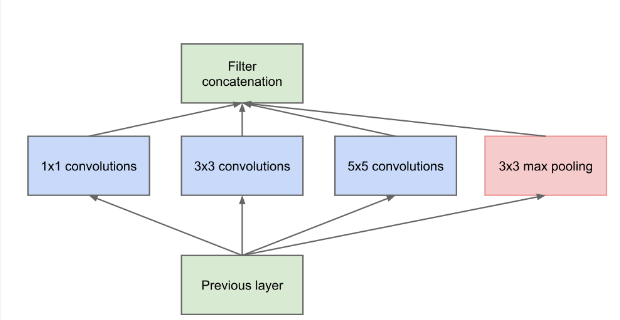



In [2]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Input,Flatten,Dense,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data Augumentation

In [3]:
batchsize=32

In [4]:
train_datagen= ImageDataGenerator(rescale=1./255, rotation_range=0.2,shear_range=0.2, 
    zoom_range=0.2,width_shift_range=0.2,
    height_shift_range=0.2)

train_data= train_datagen.flow_from_directory(r'D:\sem V\DL\Proj\Dataset_Final\train',batch_size=batchsize,target_size=(80,80),class_mode='categorical') #why categorial


Found 67917 images belonging to 2 classes.


In [5]:
val_datagen= ImageDataGenerator(rescale=1./255, rotation_range=0.2,shear_range=0.2, #why rescaling
    zoom_range=0.2,width_shift_range=0.2,
    height_shift_range=0.2)

val_data= val_datagen.flow_from_directory(r'D:\sem V\DL\Proj\Dataset_Final\val',batch_size=batchsize,target_size=(80,80),class_mode='categorical')

Found 8489 images belonging to 2 classes.


In [6]:
test_datagen= ImageDataGenerator(rescale=1./255)

test_data= test_datagen.flow_from_directory(r'D:\sem V\DL\Proj\Dataset_Final\test',batch_size=batchsize,target_size=(80,80),class_mode='categorical')

Found 8492 images belonging to 2 classes.


In [9]:
bmodel = InceptionV3(include_top=False, weights='imagenet', input_tensor=Input(shape=(80,80,3)))
model = Sequential()
model.add(bmodel)
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dense(2,activation= 'softmax'))

for layer in bmodel.layers:
    layer.trainable = False   


In [8]:
bmodel.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 80, 80, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 39, 39, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 39, 39, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 39, 39, 32)   0           ['batch_normalization[

 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 7, 7, 32)    96          ['conv2d_11[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_5 (Activation)      (None, 7, 7, 64)     0           ['batch_normalization_5[0][0]']  
                                                                                                  
 activation_7 (Activation)      (None, 7, 7, 64)     0           ['batch_normalization_7[0][0]']  
                                                                                                  
 activation_10 (Activation)     (None, 7, 7, 96)     0           ['batch_normalization_10[0][0]'] 
          

                                                                                                  
 conv2d_23 (Conv2D)             (None, 7, 7, 96)     55296       ['activation_22[0][0]']          
                                                                                                  
 batch_normalization_20 (BatchN  (None, 7, 7, 48)    144         ['conv2d_20[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_23 (BatchN  (None, 7, 7, 96)    288         ['conv2d_23[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_20 (Activation)     (None, 7, 7, 48)     0           ['batch_normalization_20[0][0]'] 
          

 conv2d_34 (Conv2D)             (None, 3, 3, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 3, 3, 128)   384         ['conv2d_34[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_34 (Activation)     (None, 3, 3, 128)    0           ['batch_normalization_34[0][0]'] 
                                                                                                  
 conv2d_35 (Conv2D)             (None, 3, 3, 128)    114688      ['activation_34[0][0]']          
                                                                                                  
 batch_normalization_35 (BatchN  (None, 3, 3, 128)   384         ['conv2d_35[0][0]']              
 ormalizat

 activation_44 (Activation)     (None, 3, 3, 160)    0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 3, 3, 160)    179200      ['activation_44[0][0]']          
                                                                                                  
 batch_normalization_45 (BatchN  (None, 3, 3, 160)   480         ['conv2d_45[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_45 (Activation)     (None, 3, 3, 160)    0           ['batch_normalization_45[0][0]'] 
                                                                                                  
 conv2d_41 (Conv2D)             (None, 3, 3, 160)    122880      ['mixed4[0][0]']                 
          

 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 3, 3, 160)    0           ['batch_normalization_55[0][0]'] 
                                                                                                  
 conv2d_51 (Conv2D)             (None, 3, 3, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_56 (Conv2D)             (None, 3, 3, 160)    179200      ['activation_55[0][0]']          
                                                                                                  
 batch_normalization_51 (BatchN  (None, 3, 3, 160)   480         ['conv2d_51[0][0]']              
 ormalization)                                                                                    
          

                                                                                                  
 conv2d_66 (Conv2D)             (None, 3, 3, 192)    258048      ['activation_65[0][0]']          
                                                                                                  
 batch_normalization_61 (BatchN  (None, 3, 3, 192)   576         ['conv2d_61[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_66 (BatchN  (None, 3, 3, 192)   576         ['conv2d_66[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_61 (Activation)     (None, 3, 3, 192)    0           ['batch_normalization_61[0][0]'] 
          

                                                                                                  
 batch_normalization_74 (BatchN  (None, 3, 3, 192)   576         ['conv2d_74[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_70 (Activation)     (None, 3, 3, 192)    0           ['batch_normalization_70[0][0]'] 
                                                                                                  
 activation_74 (Activation)     (None, 3, 3, 192)    0           ['batch_normalization_74[0][0]'] 
                                                                                                  
 conv2d_71 (Conv2D)             (None, 1, 1, 320)    552960      ['activation_70[0][0]']          
                                                                                                  
 conv2d_75

 activation_82 (Activation)     (None, 1, 1, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 1, 1, 384)    0           ['batch_normalization_83[0][0]'] 
                                                                                                  
 batch_normalization_84 (BatchN  (None, 1, 1, 192)   576         ['conv2d_84[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_76 (Activation)     (None, 1, 1, 320)    0           ['batch_normalization_76[0][0]'] 
                                                                                                  
 mixed9_0 (Concatenate)         (None, 1, 1, 768)    0           ['activation_78[0][0]',          
          

                                                                                                  
 activation_85 (Activation)     (None, 1, 1, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 (Concatenate)         (None, 1, 1, 768)    0           ['activation_87[0][0]',          
                                                                  'activation_88[0][0]']          
                                                                                                  
 concatenate_1 (Concatenate)    (None, 1, 1, 768)    0           ['activation_91[0][0]',          
                                                                  'activation_92[0][0]']          
                                                                                                  
 activation_93 (Activation)     (None, 1, 1, 192)    0           ['batch_normalization_93[0][0]'] 
          

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 80, 80, 3)]  0           []                               
                                                                                                  
 conv2d_94 (Conv2D)             (None, 39, 39, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization_94 (BatchN  (None, 39, 39, 32)  96          ['conv2d_94[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_94 (Activation)     (None, 39, 39, 32)   0           ['batch_normalization_94[0][0

 Normalization)                                                                                   
                                                                                                  
 batch_normalization_105 (Batch  (None, 7, 7, 32)    96          ['conv2d_105[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_99 (Activation)     (None, 7, 7, 64)     0           ['batch_normalization_99[0][0]'] 
                                                                                                  
 activation_101 (Activation)    (None, 7, 7, 64)     0           ['batch_normalization_101[0][0]']
                                                                                                  
 activation_104 (Activation)    (None, 7, 7, 96)     0           ['batch_normalization_104[0][0]']
          

                                                                                                  
 conv2d_117 (Conv2D)            (None, 7, 7, 96)     55296       ['activation_116[0][0]']         
                                                                                                  
 batch_normalization_114 (Batch  (None, 7, 7, 48)    144         ['conv2d_114[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_117 (Batch  (None, 7, 7, 96)    288         ['conv2d_117[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_114 (Activation)    (None, 7, 7, 48)     0           ['batch_normalization_114[0][0]']
          

 conv2d_128 (Conv2D)            (None, 3, 3, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_128 (Batch  (None, 3, 3, 128)   384         ['conv2d_128[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_128 (Activation)    (None, 3, 3, 128)    0           ['batch_normalization_128[0][0]']
                                                                                                  
 conv2d_129 (Conv2D)            (None, 3, 3, 128)    114688      ['activation_128[0][0]']         
                                                                                                  
 batch_normalization_129 (Batch  (None, 3, 3, 128)   384         ['conv2d_129[0][0]']             
 Normaliza

 activation_138 (Activation)    (None, 3, 3, 160)    0           ['batch_normalization_138[0][0]']
                                                                                                  
 conv2d_139 (Conv2D)            (None, 3, 3, 160)    179200      ['activation_138[0][0]']         
                                                                                                  
 batch_normalization_139 (Batch  (None, 3, 3, 160)   480         ['conv2d_139[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_139 (Activation)    (None, 3, 3, 160)    0           ['batch_normalization_139[0][0]']
                                                                                                  
 conv2d_135 (Conv2D)            (None, 3, 3, 160)    122880      ['mixed4[0][0]']                 
          

 Normalization)                                                                                   
                                                                                                  
 activation_149 (Activation)    (None, 3, 3, 160)    0           ['batch_normalization_149[0][0]']
                                                                                                  
 conv2d_145 (Conv2D)            (None, 3, 3, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_150 (Conv2D)            (None, 3, 3, 160)    179200      ['activation_149[0][0]']         
                                                                                                  
 batch_normalization_145 (Batch  (None, 3, 3, 160)   480         ['conv2d_145[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv2d_160 (Conv2D)            (None, 3, 3, 192)    258048      ['activation_159[0][0]']         
                                                                                                  
 batch_normalization_155 (Batch  (None, 3, 3, 192)   576         ['conv2d_155[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_160 (Batch  (None, 3, 3, 192)   576         ['conv2d_160[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_155 (Activation)    (None, 3, 3, 192)    0           ['batch_normalization_155[0][0]']
          

                                                                                                  
 batch_normalization_168 (Batch  (None, 3, 3, 192)   576         ['conv2d_168[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_164 (Activation)    (None, 3, 3, 192)    0           ['batch_normalization_164[0][0]']
                                                                                                  
 activation_168 (Activation)    (None, 3, 3, 192)    0           ['batch_normalization_168[0][0]']
                                                                                                  
 conv2d_165 (Conv2D)            (None, 1, 1, 320)    552960      ['activation_164[0][0]']         
                                                                                                  
 conv2d_16

 activation_176 (Activation)    (None, 1, 1, 384)    0           ['batch_normalization_176[0][0]']
                                                                                                  
 activation_177 (Activation)    (None, 1, 1, 384)    0           ['batch_normalization_177[0][0]']
                                                                                                  
 batch_normalization_178 (Batch  (None, 1, 1, 192)   576         ['conv2d_178[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_170 (Activation)    (None, 1, 1, 320)    0           ['batch_normalization_170[0][0]']
                                                                                                  
 mixed9_0 (Concatenate)         (None, 1, 1, 768)    0           ['activation_172[0][0]',         
          

                                                                                                  
 activation_179 (Activation)    (None, 1, 1, 320)    0           ['batch_normalization_179[0][0]']
                                                                                                  
 mixed9_1 (Concatenate)         (None, 1, 1, 768)    0           ['activation_181[0][0]',         
                                                                  'activation_182[0][0]']         
                                                                                                  
 concatenate_3 (Concatenate)    (None, 1, 1, 768)    0           ['activation_185[0][0]',         
                                                                  'activation_186[0][0]']         
                                                                                                  
 activation_187 (Activation)    (None, 1, 1, 192)    0           ['batch_normalization_187[0][0]']
          

In [11]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping, ReduceLROnPlateau

In [12]:
checkpoint = ModelCheckpoint(r'D:\sem V\DL\Proj\model\model.h5',
                            monitor='val_loss',save_best_only=True,verbose=3)

earlystop = EarlyStopping(monitor = 'val_loss', patience=10, verbose= 3, restore_best_weights=True)

learning_rate = ReduceLROnPlateau(monitor= 'val_loss', patience=10, verbose= 3)

callbacks=[checkpoint,earlystop,learning_rate]


In [14]:
model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(train_data,validation_data=val_data,callbacks=callbacks,epochs=20,batch_size=batchsize )

Epoch 1/20
2123/2123 [==============================] - ETA: 0s - loss: 0.1913 - accuracy: 0.9240
Epoch 1: val_loss improved from inf to 0.16250, saving model to D:\sem V\DL\Proj\model\model.h5
2123/2123 [==============================] - 838s 390ms/step - loss: 0.1913 - accuracy: 0.9240 - val_loss: 0.1625 - val_accuracy: 0.9342 - lr: 0.0010
Epoch 2/20
2123/2123 [==============================] - ETA: 0s - loss: 0.1741 - accuracy: 0.9312
Epoch 2: val_loss improved from 0.16250 to 0.15697, saving model to D:\sem V\DL\Proj\model\model.h5
2123/2123 [==============================] - 806s 379ms/step - loss: 0.1741 - accuracy: 0.9312 - val_loss: 0.1570 - val_accuracy: 0.9395 - lr: 0.0010
Epoch 3/20
2123/2123 [==============================] - ETA: 0s - loss: 0.1678 - accuracy: 0.9334
Epoch 3: val_loss improved from 0.15697 to 0.14221, saving model to D:\sem V\DL\Proj\model\model.h5
2123/2123 [==============================] - 822s 387ms/step - loss: 0.1678 - accuracy: 0.9334 - val_loss: 0.1

In [16]:
history = model.history.history
print(history)

{'loss': [0.19128738343715668, 0.17408205568790436, 0.16782115399837494, 0.16292282938957214, 0.16269616782665253, 0.1568356603384018, 0.15518082678318024, 0.15020830929279327, 0.15009184181690216, 0.15020747482776642, 0.14817440509796143, 0.1482691764831543, 0.14394092559814453, 0.14438290894031525, 0.14494188129901886, 0.14214083552360535, 0.14266268908977509, 0.13880769908428192, 0.14048174023628235, 0.1390572339296341], 'accuracy': [0.923980712890625, 0.9312248826026917, 0.933433473110199, 0.9360837340354919, 0.9359953999519348, 0.9379242062568665, 0.9383659362792969, 0.9410604238510132, 0.9424738883972168, 0.9406481385231018, 0.9416640996932983, 0.9416346549987793, 0.9430628418922424, 0.9446088671684265, 0.9439021348953247, 0.9440640807151794, 0.9444910883903503, 0.9458162188529968, 0.9443732500076294, 0.945418655872345], 'val_loss': [0.16250412166118622, 0.15696802735328674, 0.1422068178653717, 0.15316185355186462, 0.14074493944644928, 0.147498220205307, 0.13955064117908478, 0.13

Text(0, 0.5, 'Accuracy')

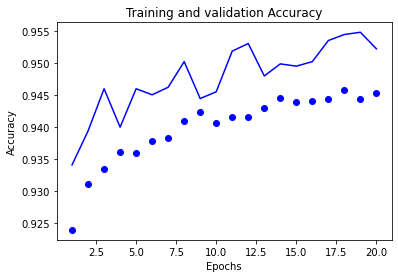

In [19]:
acc = history['accuracy']
val_acc = history['val_accuracy']

epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

Text(0, 0.5, 'Loss')

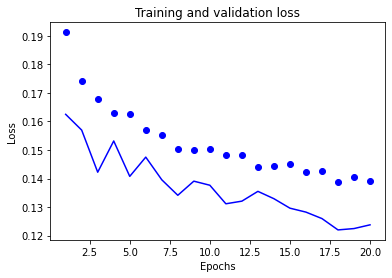

In [20]:
loss = history['loss']
val_loss = history['val_loss']

epochs = range(1, len(acc)+1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [23]:
hisory_test = model.evaluate(test_data)

266/266 [==============================] - 60s 226ms/step - loss: 0.0984 - accuracy: 0.9648
